In [1]:
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Lasso,HuberRegressor,QuantileRegressor
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_excel('imoveis.xlsx')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.fillna(0,inplace=True)
df = df[df['preço'] >= 1]
df['p m2'] = df['preço'] / df['area']
df.describe()

,area,preço,condominio,quartos,vagas,Academia,Aceita animais,Acesso para deficientes,Andar inteiro,Aquecimento,...,Varanda fechada com vidro,Varanda gourmet,Vigia,Vista exterior,Vista para a montanha,Vista para lago,Vista para o mar,Área de lazer,Área de serviço,p m2
count,27980.000000,2.798000e+04,2.798000e+04,27980.000000,27980.000000,27980.000000,27980.000000,27980.000000,27980.000000,27980.000000,...,27980.000000,27980.000000,27980.000000,27980.000000,27980.000000,27980.000000,27980.000000,27980.000000,27980.000000,2.798000e+04
mean,81.053181,3.944457e+08,1.946431e+03,2.236276,1.220622,0.295139,0.041816,0.000715,0.000036,0.003788,...,0.000036,0.021408,0.004968,0.000286,0.000036,0.000071,0.000143,0.000429,0.193531,inf
std,95.655134,6.209273e+09,4.288554e+04,0.834943,2.030356,0.456114,0.200171,0.026727,0.005978,0.061435,...,0.005978,0.144743,0.070309,0.016907,0.005978,0.008454,0.011956,0.020705,0.395073,NaN
min,0.000000,3.500000e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.870039e+01
25%,50.000000,3.500000e+05,3.450000e+02,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.428571e+03
50%,67.000000,5.300000e+05,5.500000e+02,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.128571e+03
75%,89.000000,8.385272e+05,8.000000e+02,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.031746e+04
max,4598.000000,3.100003e+11,4.100000e+06,20.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,inf


In [3]:
df2 = df[df['preço'] < 10**6*2]
df2 = df2[df2['p m2'] < 20000]
df2 = df2[df2['p m2'] > 3500]
df2 = df2[df2['area'] <= 200]
df2 = df2[df2['area'] >= 15]
df2 = df2[df2['vagas'] <= 4]
df2 = df2[df2['quartos'] <= 4]
df2 = df2[df2['status'] == 'usado']

In [19]:
df3 = df2.groupby(['endereço','vagas','area','bairro','quartos'],as_index =False)['preço','p m2'].mean()

<ipython-input-19-43ac00b63c01>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3 = df2.groupby(['endereço','vagas','area','bairro','quartos'],as_index =False)['preço','p m2'].mean()


In [20]:
df4 = pd.get_dummies(df3,columns=['bairro'])
df4

,endereço,vagas,area,quartos,preço,p m2,bairro_Barra Funda,bairro_Belenzinho,bairro_Brás,bairro_Butantã,bairro_Jaguaré,bairro_Liberdade,bairro_Republica,bairro_Rio Pequeno,bairro_Saúde,bairro_Sé,bairro_Tatuapé,bairro_Vila Mariana
0,Alameda Barão de Limeira,0.0,83,3.0,450000.0,5421.686747,0,0,0,0,0,0,1,0,0,0,0,0
1,Alameda Barão de Limeira,1.0,90,2.0,580000.0,6444.444444,1,0,0,0,0,0,0,0,0,0,0,0
2,"Alameda Barão de Limeira, 0",0.0,37,1.0,237115.0,6408.513514,0,0,0,0,0,0,1,0,0,0,0,0
3,Alameda Eduardo Prado,1.0,40,1.0,255000.0,6375.000000,1,0,0,0,0,0,0,0,0,0,0,0
4,Alameda Eduardo Prado,1.0,49,2.0,320000.0,6530.612245,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12503,Vila Tagipuru,2.0,87,2.0,960000.0,11034.482759,1,0,0,0,0,0,0,0,0,0,0,0
12504,Vila Tagipuru,2.0,127,3.0,1340000.0,10551.181102,1,0,0,0,0,0,0,0,0,0,0,0
12505,"Vila Tagipuru, 1060",2.0,126,3.0,1378000.0,10936.507937,1,0,0,0,0,0,0,0,0,0,0,0
12506,"Vila Tagipuru, 1060",3.0,162,3.0,1300000.0,8024.691358,1,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='vagas', ylabel='p m2'>

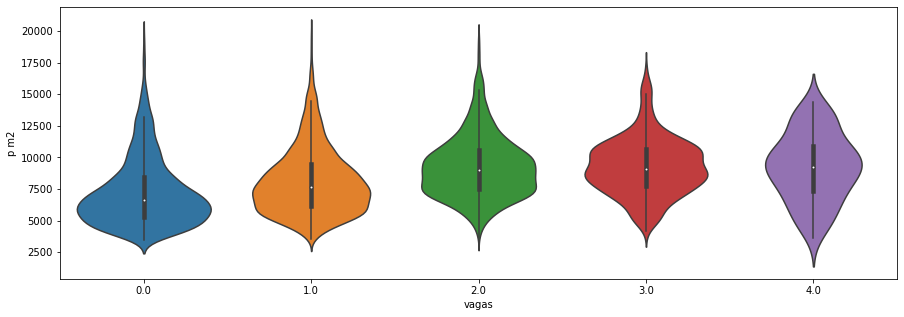

In [21]:
plt.figure(figsize=(15,5))
sns.violinplot(y=df3['p m2'],x=df3['vagas'])

<AxesSubplot:xlabel='quartos', ylabel='p m2'>

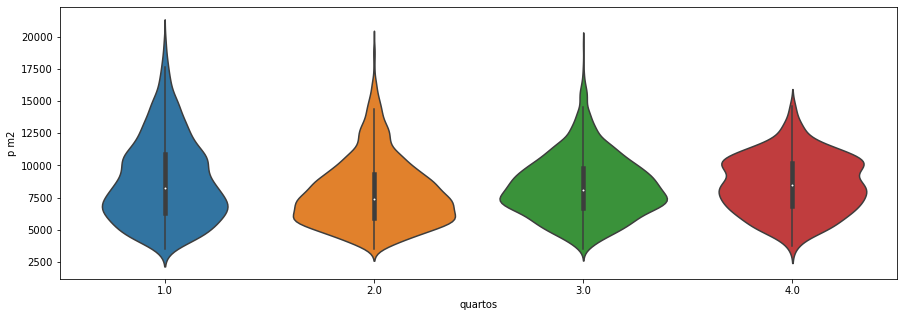

In [22]:
plt.figure(figsize=(15,5))
sns.violinplot(y=df3['p m2'],x=df3['quartos'])

<AxesSubplot:xlabel='bairro', ylabel='p m2'>

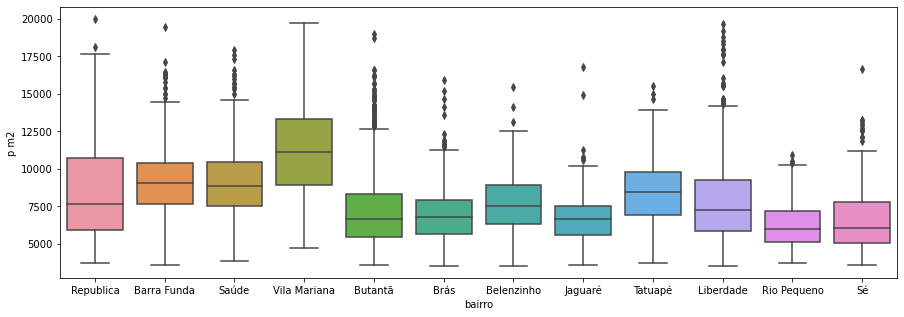

In [23]:
plt.figure(figsize=(15,5))
sns.boxplot(y=df3['p m2'],x=df3['bairro'])

In [24]:
#plt.figure(figsize=(15,5))
#sns.displot(df3,x='p m2',col='quartos',row='bairro')

<AxesSubplot:xlabel='area', ylabel='preço'>

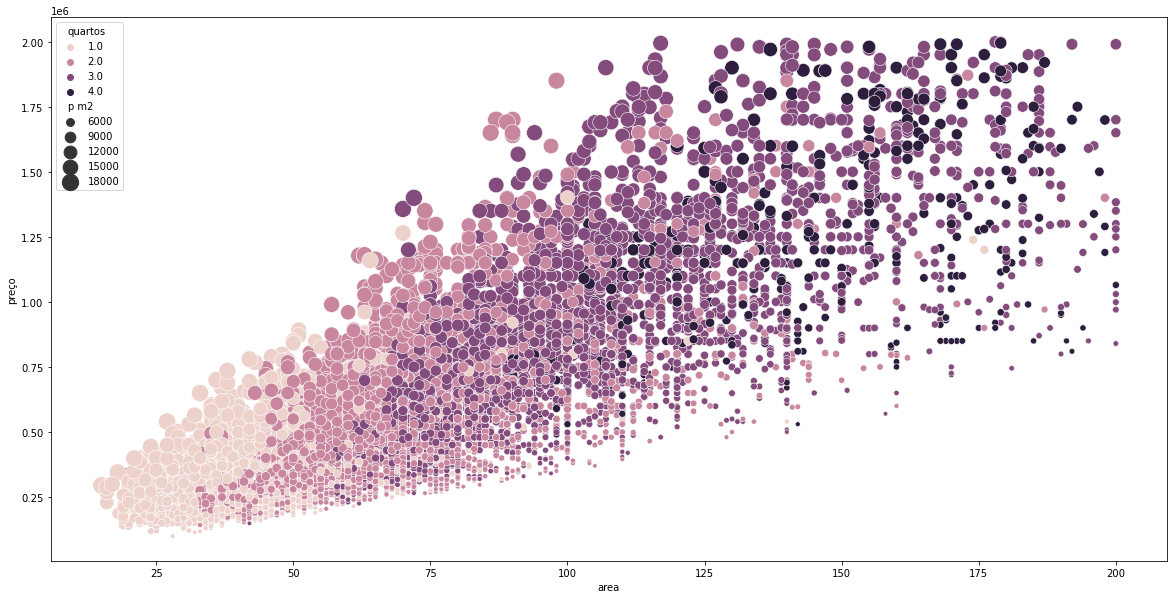

In [25]:
plt.figure(figsize=(20,10))

sns.scatterplot(data=df3,x='area',y='preço',hue='quartos',size='p m2',sizes=(20,300))

In [26]:
x = df4.drop(['endereço','preço','p m2'],axis=1)
y = df4['preço']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42)


In [35]:
model_linear = LinearRegression()
model_linear.fit(x_train,y_train)
predict_linear = model_linear.predict(x_test)

Score: 0.7818733318069416


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='preço'>

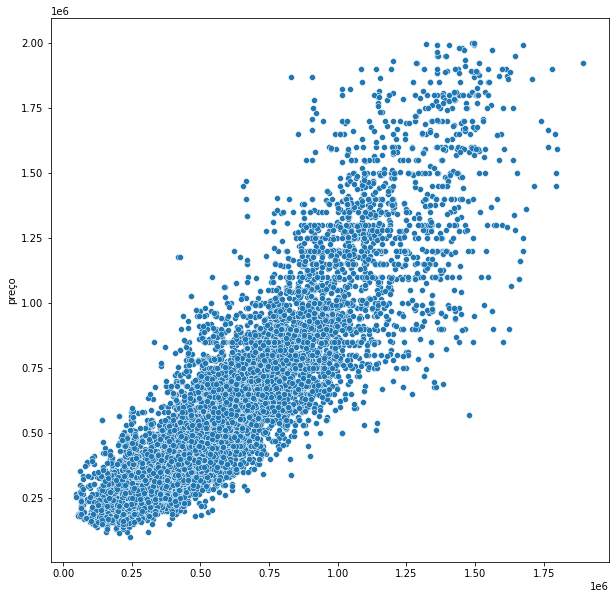

In [36]:
print(f'Score: {model_linear.score(x_test,y_test)}')
plt.figure(figsize=(10,10))
sns.scatterplot(predict_linear,y_test)

In [37]:
pd.DataFrame({'Valores':x.columns,'Coef':model_linear.coef_.round(2)})

,Valores,Coef
0,vagas,114128.73
1,area,6660.78
2,quartos,-7498.67
3,bairro_Barra Funda,73511.63
4,bairro_Belenzinho,-139.78
5,bairro_Brás,-46219.06
6,bairro_Butantã,-82881.14
7,bairro_Jaguaré,-123725.89
8,bairro_Liberdade,8910.23
9,bairro_Republica,44078.67


Score: 0.7818716189527575


C:\Users\a92550\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.818e+12, tolerance: 3.237e+10
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='preço'>

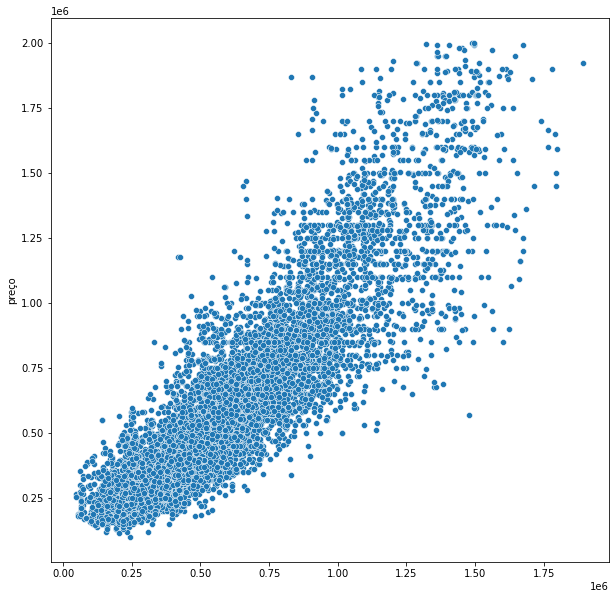

In [38]:
model_Lasso = Lasso()
model_Lasso.fit(x_train,y_train)
predict_Lasso = model_Lasso.predict(x_test)

print(f'Score: {model_Lasso.score(x_test,y_test)}')
plt.figure(figsize=(10,10))
sns.scatterplot(predict_Lasso,y_test)

In [39]:
qr_model = QuantileRegressor(alpha=0)

In [40]:
qr_model.fit(x_train,y_train)

KeyboardInterrupt: 